# Example: IMDb movie review 분류

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### The IMDB dataset


- A set of 50,000 highly-polarized reviews from the Internet Movie Database
    - 25,000 reviews for training and 25,000 reviews for testing
    - 50% negative(label=0) and 50% positive(label=1) reviews



### Loading data

In [3]:
with open("imdb_data/X_train.pkl", 'rb') as f:
    X_train = pickle.load(f)
    
with open('imdb_data/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
    
with open('imdb_data/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
    
with open('imdb_data/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [6]:
type(X_train), type(y_train)

(list, numpy.ndarray)

In [7]:
y_train[0]

1

In [8]:
X_train[0]

'zero day lead think even think two boy young men would commit mutual suicid via slaughter classmat captur must beyond bizarr mode two human decid withdraw common civil order defin mutual world via coupl destruct perfect movi given money time filmmak actor remark product term explain motiv action two young suicid murder better eleph term film get rationalist skin far far better film almost anyth like see flaw honest terribl honesti'

In [9]:
# Feature Vectorization (텍스트->숫자)
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [11]:
X_train_tfidf.shape, X_test_tfidf.shape

((25000, 10000), (25000, 10000))

In [12]:
y_train.dtype

dtype('int32')

In [13]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### 모델 생성
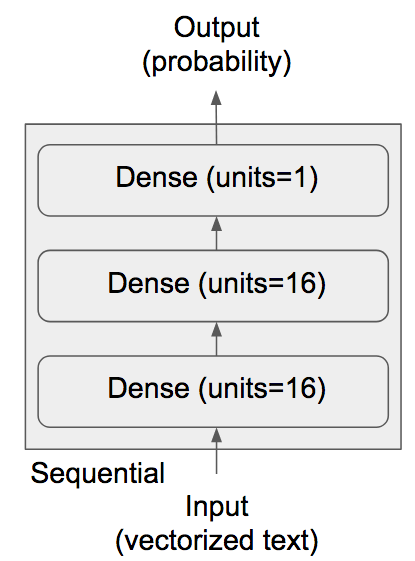

In [14]:
from tensorflow.keras import models, layers

In [15]:
# 모델 생성
model = models.Sequential()
# layer 추가 - Dense layer(fully connected layer)
# 은닉층(hidden layer)
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
# 출력층(output layer)
model.add(layers.Dense(units=1, activation='sigmoid')) 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### 컴파일

In [17]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy']) 

### 학습(fit) - 검증(Validation) 셋을 이용

- Training set을 train과 validation set으로 나눠 학습과 검증을 같이 처리한다.
    - 25000 중 15000를 train으로 10000은 validation set으로 사용한다.

In [22]:
X_val = X_train_tfidf[:15000]
X_part = X_train_tfidf[15000:]

y_val = y_train[:15000]
y_part = y_train[15000:]

In [23]:
X_val.shape, X_part.shape, y_val.shape, y_part.shape

((15000, 10000), (10000, 10000), (15000,), (10000,))

In [24]:
hist = model.fit(X_val, y_val, epochs=20, batch_size=128,
                 validation_data=(X_part, y_part)   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 283us/sample - loss: 0.5911 - accuracy: 0.7607 - val_loss: 0.4255 - val_accuracy: 0.8675
Epoch 2/20
15000/15000 [==============================] - 4s 255us/sample - loss: 0.2909 - accuracy: 0.9059 - val_loss: 0.2792 - val_accuracy: 0.8865
Epoch 3/20
15000/15000 [==============================] - 4s 252us/sample - loss: 0.1725 - accuracy: 0.9426 - val_loss: 0.2806 - val_accuracy: 0.8804
Epoch 4/20
15000/15000 [==============================] - 4s 254us/sample - loss: 0.1182 - accuracy: 0.9659 - val_loss: 0.2998 - val_accuracy: 0.8771
Epoch 5/20
15000/15000 [==============================] - 4s 250us/sample - loss: 0.0834 - accuracy: 0.9782 - val_loss: 0.3354 - val_accuracy: 0.8715
Epoch 6/20
15000/15000 [==============================] - 4s 267us/sample - loss: 0.0580 - accuracy: 0.9885 - val_loss: 0.3760 - val_accuracy: 0.8675
Epoch 7/20
15000/15000 [==========================

### epoch 별 평가 지표 확인

In [ ]:
{'loss':[20], 'accuracy':[20], 'val_loss':[], 'val_accuracy':[]}

In [25]:
hist.history

{'loss': [0.59108985303243,
  0.2908552343606949,
  0.17245565849542618,
  0.11824593952496847,
  0.08341426749229432,
  0.05803779574433963,
  0.040315796533226964,
  0.027396858236193658,
  0.018428700511654218,
  0.012588502945005894,
  0.008483486987898747,
  0.005847868716468414,
  0.004083667775491873,
  0.0029654626975456873,
  0.002340369002521038,
  0.0019039251039425532,
  0.0014464605361844103,
  0.0010593914216384293,
  0.0008769378862654169,
  0.0007377184530642505],
 'accuracy': [0.7607333,
  0.9059333,
  0.9426,
  0.9659333,
  0.9782,
  0.9885333,
  0.9938667,
  0.99653333,
  0.99826664,
  0.99873334,
  0.9992,
  0.9996,
  0.9998,
  0.99986666,
  0.99993336,
  0.99993336,
  0.99993336,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.4255150932312012,
  0.2792080213546753,
  0.28059223585128784,
  0.2997511515855789,
  0.3354088755607605,
  0.37603400654792785,
  0.4144123887062073,
  0.46077314891815185,
  0.4986676251411438,
  0.5390626512765885,
  0.5741142279624939,
  0.6083178

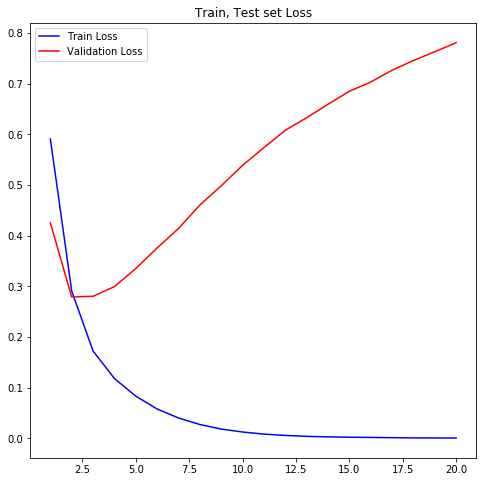

In [28]:
epochs = range(1,21)
plt.figure(figsize=(8,8))
plt.plot(epochs, hist.history['loss'], color='blue', label='Train Loss')
plt.plot(epochs, hist.history['val_loss'], color='red', label='Validation Loss')
plt.title('Train, Test set Loss')
plt.legend()
plt.show()

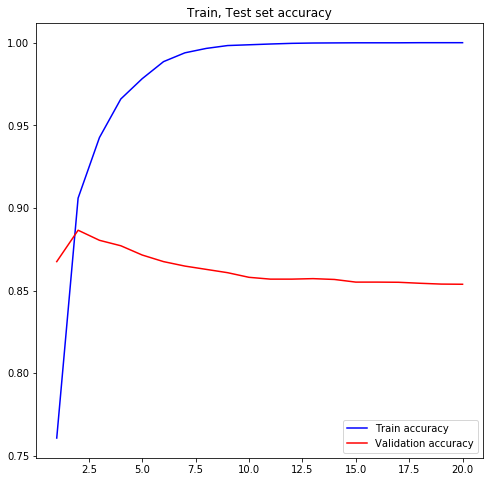

In [29]:
epochs = range(1,21)
plt.figure(figsize=(8,8))
plt.plot(epochs, hist.history['accuracy'], color='blue', label='Train accuracy')
plt.plot(epochs, hist.history['val_accuracy'], color='red', label='Validation accuracy')
plt.title('Train, Test set accuracy')
plt.legend()
plt.show()

### 테스트 셋으로 평가

In [30]:
model.evaluate(X_test_tfidf, y_test)

25000/25000 [==============================] - 4s 171us/sample - loss: 0.9654 - accuracy: 0.8255


[0.965404279859066, 0.82548]

### 학습된 모델로 예측


In [32]:
pred = model.predict(X_test_tfidf[0])
pred

array([[0.00016157]], dtype=float32)

In [33]:
pred_cls = model.predict_classes(X_test_tfidf[0])
pred_cls

array([[0]])

In [34]:
y_test[0]

1.0